# FORMULA 1 - 2025 SEASON ANALYSIS

## Created by Madhanadeva D

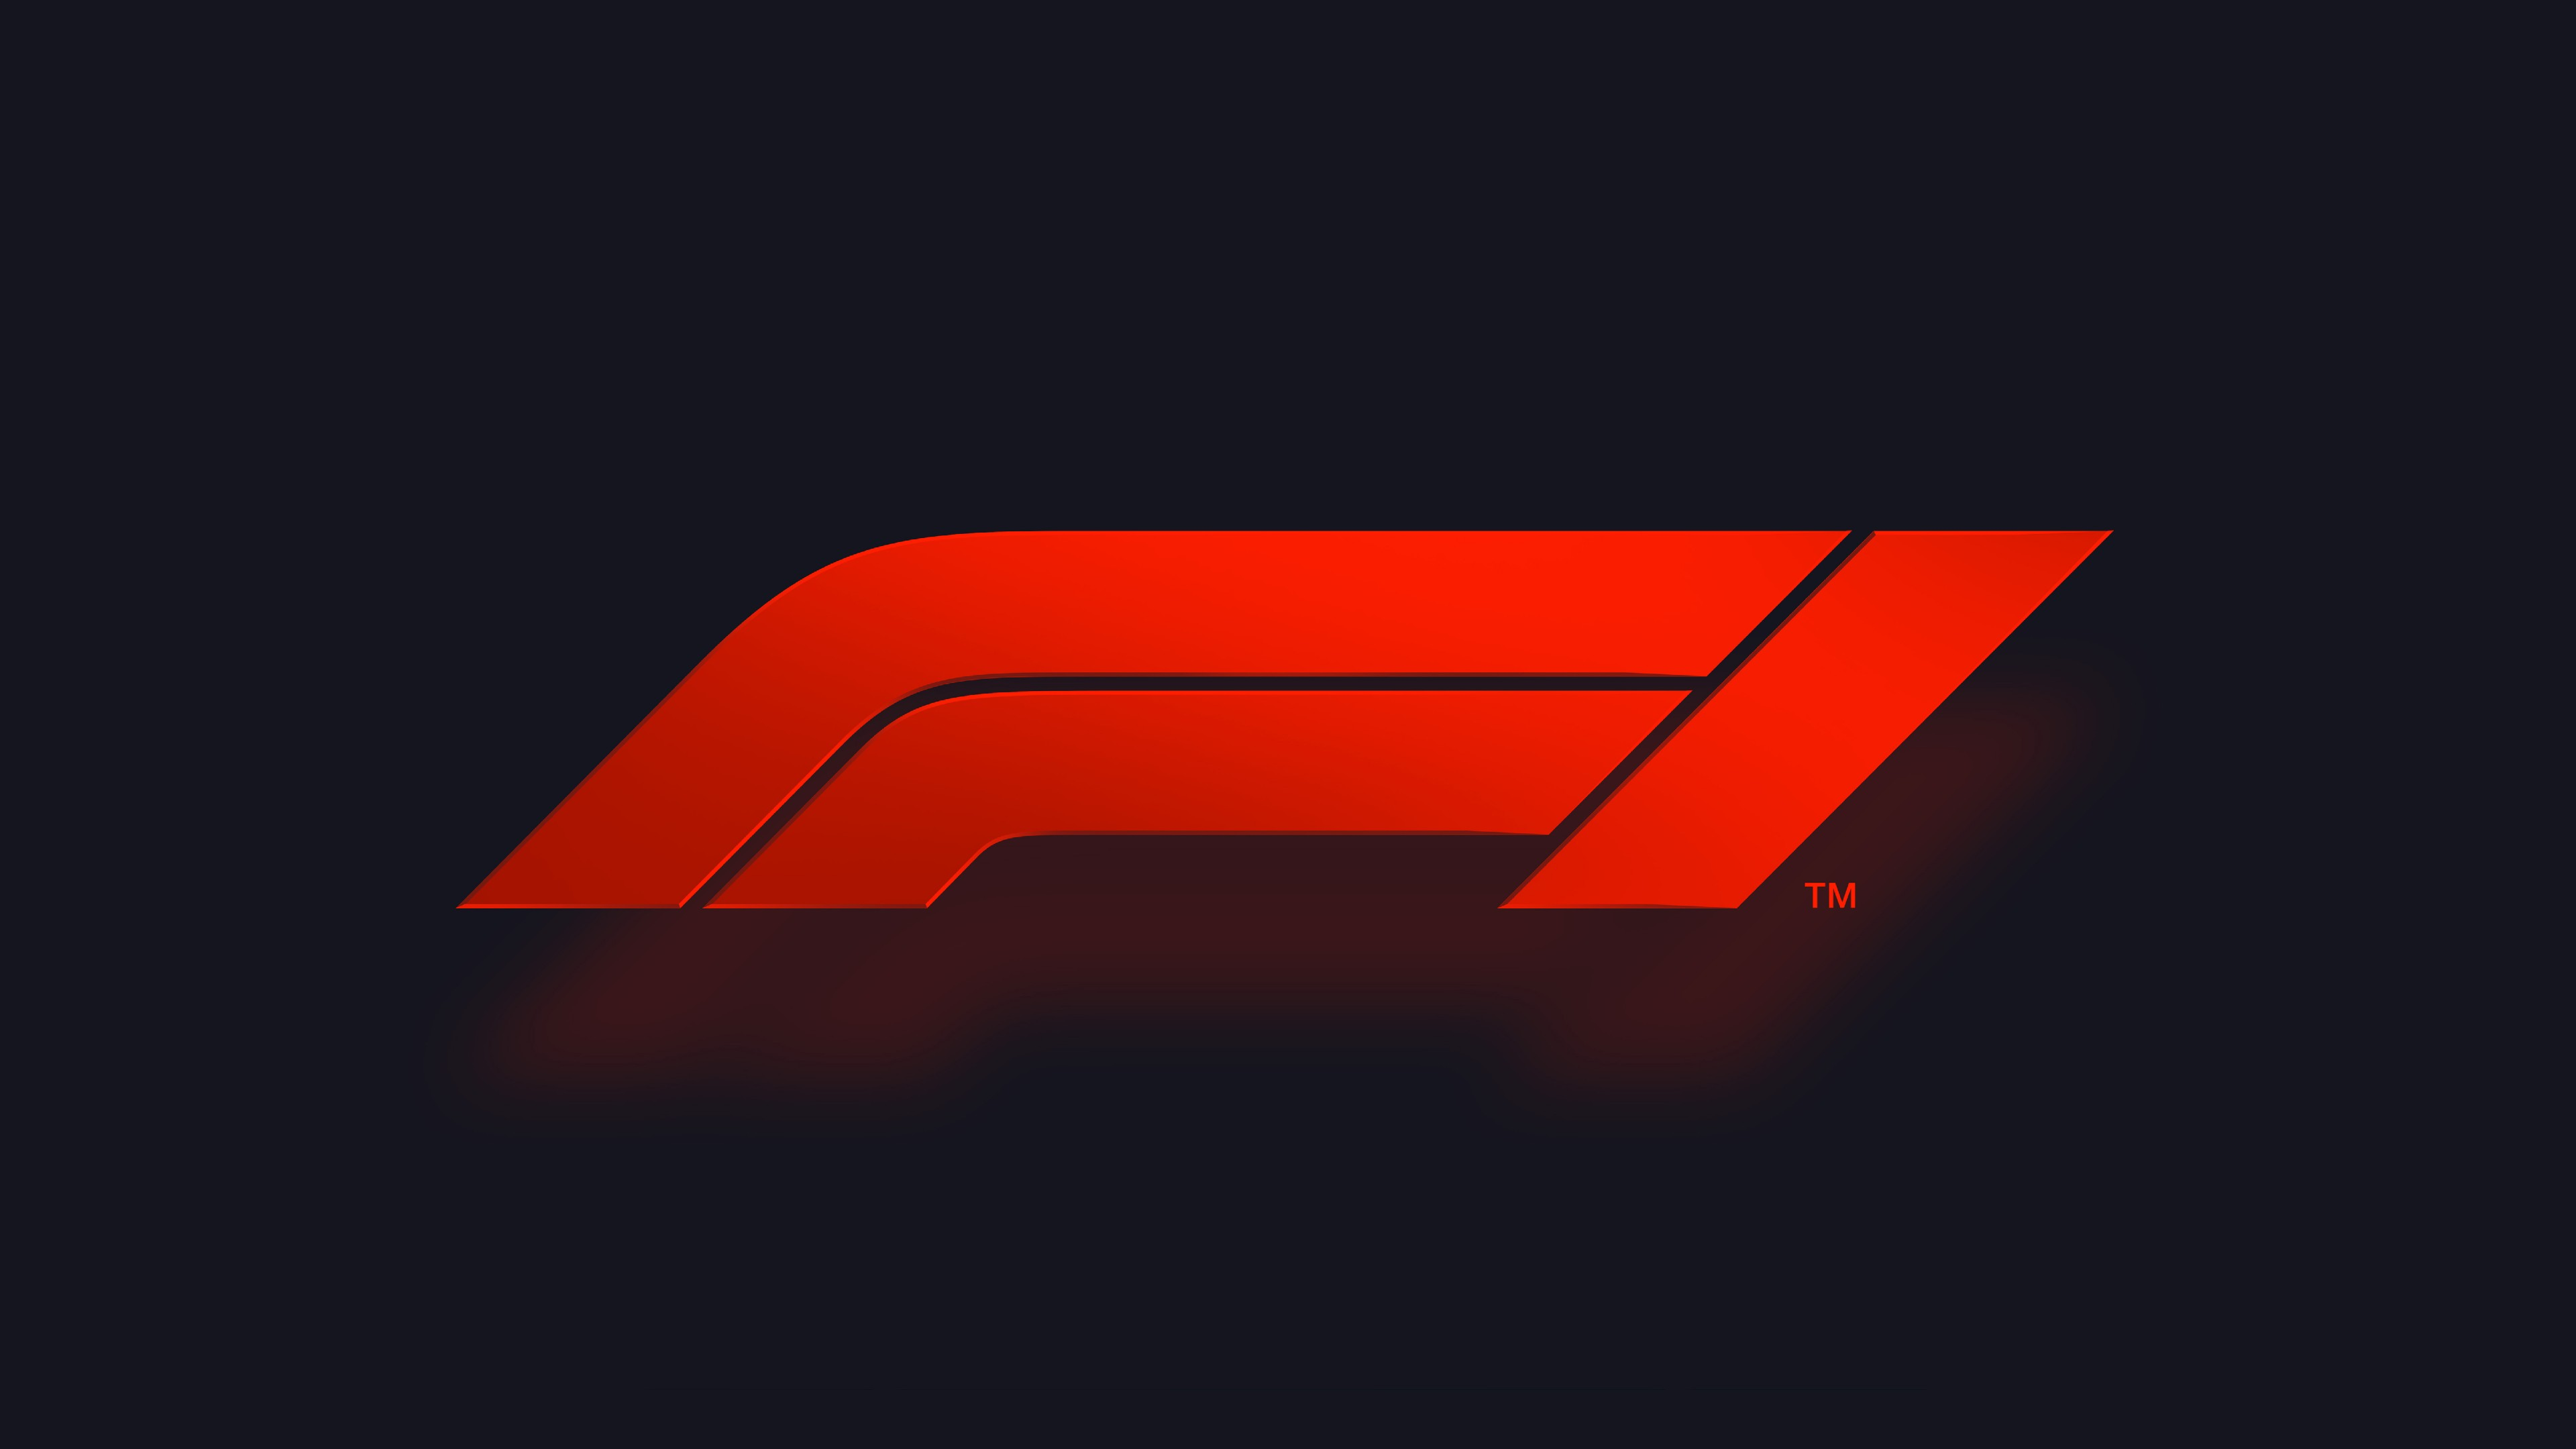

## 2025 Season Analysis of Formula 1 World Championship!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import math
from datetime import timedelta
%matplotlib inline
font_manager.fontManager.addfont('img/formula1-regular-web-0.ttf')

In [3]:
season2025RaceCalendar = pd.read_csv("Data/Formula1_2025Season_Calendar.csv")
season2025RaceCalendar.set_index("Round", inplace=True)
season2025Drivers = pd.read_csv("Data/Formula1_2025Season_Drivers.csv")
season2025Drivers.set_index("Abbreviation", inplace=True)
season2025Teams = pd.read_csv("Data/Formula1_2025Season_Teams.csv")
season2025Teams.index = range(1, len(season2025Teams) + 1)
season2025SprintResults = pd.read_csv('Data/Formula1_2025season_sprintResults.csv')
season2025SprintQualiResults = pd.read_csv('Data/Formula1_2025season_sprintQualifyingResults.csv')
season2025QualifyingResults = pd.read_csv("Data/Formula1_2025Season_QualifyingResults.csv")
season2025RaceResults = pd.read_csv("Data/Formula1_2025Season_RaceResults.csv")
season2025DotdVotes = pd.read_csv("Data/Formula1_2025Season_DriverOfTheDayVotes.csv")
season2025DotdVotes.set_index("Track", inplace=True)

In [4]:
def assign_color(val_type, values):
    cl = []
    for val in values:
        if val_type == 'drivers':
            abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':
            abbr = val[0:4].upper()
        if abbr in ['KICK','BOT','ZHO']:                 cl.append('#52D752')
        elif abbr in ['HAAS','HUL','MAG','BEA']:         cl.append('#FFFFFF')
        elif abbr in ['ASTO','ALO','STR']:               cl.append('#006F62')
        elif abbr in ['WILL','ALB','SAR','COL','SAI']:   cl.append('#005AFF')
        elif abbr in ['RB H','TSU','RIC','LAW']:         cl.append('#6692D1')
        elif abbr in ['MCLA','NOR','PIA']:               cl.append('#FF8205')
        elif abbr in ['RED ','VER','PER']:               cl.append('#0600F0')
        elif abbr in ['FERR','LEC','HAM']:               cl.append('#FF0000')                                                                                   
        elif abbr in ['MERC','HAM','RUS','ANT']:         cl.append('#00C8AA')
        elif abbr in ['ALPI','GAS','OCO','DOO']:         cl.append('#FF87BB')
    return cl


## 2025 Season Race Calendar

In [5]:
season2025RaceCalendar

,Race Date,GP Name,Country,City,Circuit Name,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
Round,,,,,,,,,,,,,,
1,16/03/2025,Louis Vuitton Australian Grand Prix,Australia,Melbourne,Albert Park Circuit,1996,58,5.278,306.124,1:19.813,Charles Leclerc,2024,14,4
2,23/03/2025,Heineken Chinese Grand Prix,China,Shanghai,Shanghai International Circuit,2004,56,5.451,305.066,1:32.238,Michael Schumacter,2004,16,2
3,06/04/2025,Lenovo Japanese Grand Prix,Japan,Suzuka,Suzuka Circuit,1987,53,5.807,307.471,1:30.965,Kimi Antonelli,2025,18,1
4,13/04/2025,Gulf Air Bahrain Grand Prix,Bahrain,Sakhir,Bahrain International Circuit,2004,57,5.412,308.238,1:31.447,Pedro de la Rosa,2005,15,3
5,20/04/2025,STC Saudi Arabian Grand Prix,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,2021,50,6.174,308.450,1:30.734,Lewis Hamilton,2021,27,3
6,04/05/2025,Crypto.com Miami Grand Prix,United States,Miami,Miami International Autodrome,2022,57,5.412,308.326,1:29.708,Max Verstappen,2023,19,3
7,18/05/2025,AWS Gran Premio Del Made in Italy e Dell'Emili...,Italy,Imola,Autodromo Internazionale Enzo e Dino Ferrari,1980,63,4.909,309.049,1:15.484,Lewis Hamilton,2020,19,1
8,25/05/2025,Tag Heuer Grand Prix de Monaco,Monaco,Monaco,Circuit de Monaco,1950,78,3.337,260.286,1:12.909,Lewis Hamilton,2021,19,1
9,01/06/2025,Aramco Gran Premio de España,Spain,Barcelona,Circuit de Barcelona-Catalunya,1991,66,4.657,307.236,1:15.743,Oscar Piastri,2025,14,2


## 2025 Season Drivers

![F1_Driver_Lineup.jpg](img\F1_Driver_Lineup.jpg)

In [6]:
season2025Drivers

,Driver,Race Number,Team,Country,Grand Prix Entered,Career Points,Highest Race Finish,Podiums,Highest Grid Position,Pole Positions,World Championships,DNFs,Date of Birth,Place of Birth
Abbreviation,,,,,,,,,,,,,,
NOR,Lando Norris,4,McLaren,United Kingdom,152,1430.0,1(x11),44,1(x16),16,1,13,13/11/1999,"Bristol, England"
PIA,Oscar Piastri,81,McLaren,Australia,70,799.0,1(x9),26,1(x6),6,0,4,06/04/2001,"Melbourne, Victoria"
RUS,George Russell,63,Mercedes,United Kingdom,152,1033.0,1(x5),24,1(x8),7,0,19,15/02/1998,"King's Lynn, England"
ANT,Kimi Antonelli,12,Mercedes,Italy,24,150.0,2(x1),3,2(x1),0,0,4,25/08/2006,"Bologna, Italy"
VER,Max Verstappen,1,Red Bull Racing,Netherlands,233,3444.5,1(x71),127,1(x48),48,4,33,30/09/1997,"Hasselt, Belgium"
TSU,Yuki Tsunoda,22,Red Bull Racing,Japan,111,124.0,4(x1),0,3(x1),0,0,15,11/05/2000,"Sagamihara, Japan"
LEC,Charles Leclerc,16,Ferrari,Monaco,171,1672.0,1(x8),50,1(x27),27,0,23,16/10/1997,"Monte Carlo, Monaco"
HAM,Lewis Hamilton,44,Ferrari,United Kingdom,380,5018.5,1(x105),202,1(x104),104,7,34,07/01/1985,"Stevenage, England"
ALB,Alexander Albon,23,Williams,Thailand,128,313.0,3(x2),2,4(x5),0,0,22,23/03/1996,"London, England"


## 2025 Season Teams

![F1_Team_Lineup.jpg](img\F1_Team_Lineup.jpg)

In [7]:
season2025Teams

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,Grand Prix Entered,Team Points,Highest Race Finish,Podiums,Highest Grid Position,Pole Positions,World Championships
1,McLaren,McLaren Formula 1 Team,"Woking, United Kingdom",Andrea Stella,Peter Prodromou / Neil Houldey,MCL39,Mercedes,1966,995,7783.5,1(x203),445,1(x177),177,10
2,Mercedes,Mercedes-AMG Petronas Formula One Team,"Brackley, United Kingdom",Toto Wolff,James Allison,W16,Mercedes,1970,329,8159.5,1(x122),201,1(x136),135,8
3,Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Laurent Mekies,Pierre Waché,RB21,Honda RBPT,1997,418,8288.0,1(x130),233,1(x111),111,6
4,Ferrari,Scuderia Ferrari HP,"Maranello, Italy",Frédéric Vasseur,Loic Serra / Enrico Gualtieri,SF-25,Ferrari,1950,1123,10675.0,1(x249),639,1(x254),254,16
5,Williams,Atlassian Williams Racing,"Grove, United Kingdom",James Vowles,Pat Fry,FW47,Mercedes,1978,851,3768.0,1(x114),245,1(x128),128,9
6,Racing Bulls,Visa Cash App Racing Bulls Formula One Team,"Faenza, Italy",Alan Permane,Tim Goss,VCARB 02,Honda RBPT,1985,399,947.0,1(x2),6,1(x1),1,0
7,Aston Martin,Aston Martin Aramco Formula One Team,"Silverstone, United Kingdom",Andy Cowell,Enrico Cardile,AMR25,Mercedes,2018,152,863.0,1(x1),12,1(x1),1,0
8,Haas F1 Team,MoneyGram Haas F1 Team,"Kannapolis, United States",Ayao Komatsu,Andrea De Zordo,VF-25,Ferrari,2016,214,386.0,4(x2),0,4(x1),1,0
9,Kick Sauber,Stake F1 Team Kick Sauber,"Hinwil, Switzerland",Jonathan Wheatley,James Key,C45,Ferrari,1993,615,1088.0,1(x1),27,1(x1),1,0
10,Alpine,BWT Alpine Formula One Team,"Enstone, United Kingdom",Flavio Briatore,David Sanchez,A525,Renault,1986,392,2000.0,1(x21),60,1(x20),20,2


## F1 Race Tracks

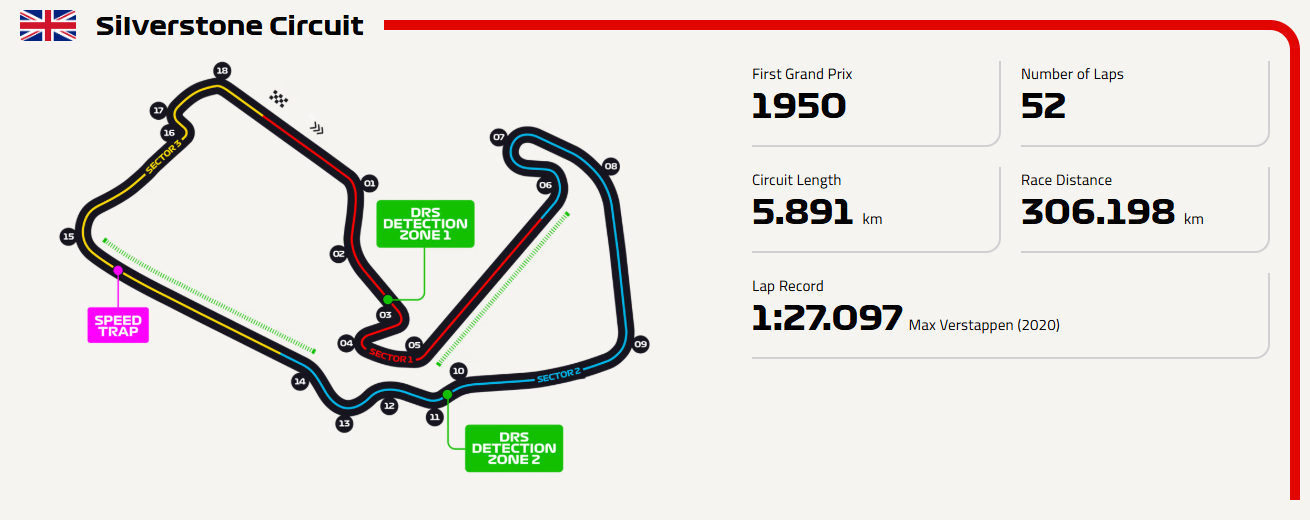

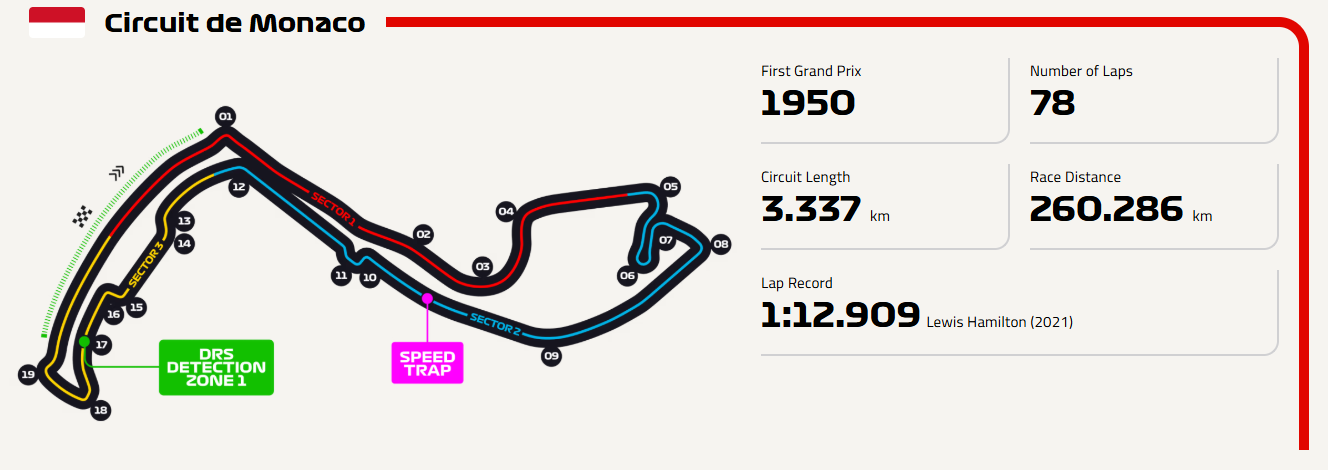

### Saudi Arabia Grand Prix 2025

In [8]:
season2025RaceResults[season2025RaceResults['Track'] == 'Saudi Arabia'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,81,Oscar Piastri,McLaren Mercedes,2,50,21:06.8,25,No,01:32.2
2,1,Max Verstappen,Red Bull Racing Honda RBPT,1,50,2.843,18,No,01:32.3
3,16,Charles Leclerc,Ferrari,4,50,8.104,15,No,01:32.2
4,4,Lando Norris,McLaren Mercedes,10,50,9.196,12,Yes,01:31.8
5,63,George Russell,Mercedes,3,50,27.236,10,No,01:32.9
6,12,Kimi Antonelli,Mercedes,5,50,34.688,8,No,01:32.4
7,44,Lewis Hamilton,Ferrari,7,50,39.073,6,No,01:32.6
8,55,Carlos Sainz,Williams Mercedes,6,50,64.63,4,No,01:32.5
9,23,Alexander Albon,Williams Mercedes,11,50,66.515,2,No,01:33.5


### Grand Prix de Monaco 2025

In [9]:
season2025RaceResults[season2025RaceResults['Track'] == 'Monaco'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,4,Lando Norris,McLaren Mercedes,1,78,40:33.8,25,Yes,01:13.2
2,16,Charles Leclerc,Ferrari,2,78,3.131,18,No,01:14.1
3,81,Oscar Piastri,McLaren Mercedes,3,78,3.658,15,No,01:13.7
4,1,Max Verstappen,Red Bull Racing Honda RBPT,4,78,20.572,12,No,01:14.2
5,44,Lewis Hamilton,Ferrari,7,78,51.387,10,No,01:14.1
6,6,Isack Hadjar,Racing Bulls Honda RBPT,5,77,+1 lap,8,No,01:16.0
7,31,Esteban Ocon,Haas Ferrari,8,77,+1 lap,6,No,01:15.2
8,30,Liam Lawson,Racing Bulls Honda RBPT,9,77,+1 lap,4,No,01:15.3
9,23,Alexander Albon,Williams Mercedes,10,76,+2 laps,2,No,01:14.6


### Grand Prix du Canada 2025

In [10]:
season2025RaceResults[season2025RaceResults['Track'] == 'Canada'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,63,George Russell,Mercedes,1,70,31:52.7,25,Yes,01:14.1
2,1,Max Verstappen,Red Bull Racing Honda RBPT,2,70,0.228,18,No,01:14.3
3,12,Kimi Antonelli,Mercedes,4,70,1.014,15,No,01:14.5
4,81,Oscar Piastri,McLaren Mercedes,3,70,2.109,12,No,01:14.3
5,16,Charles Leclerc,Ferrari,8,70,3.442,10,No,01:14.3
6,44,Lewis Hamilton,Ferrari,5,70,10.713,8,No,01:14.8
7,14,Fernando Alonso,Aston Martin Aramco Mercedes,6,70,10.972,6,No,01:15.0
8,27,Nico Hulkenberg,Kick Sauber Ferrari,11,70,15.364,4,No,01:15.4
9,31,Esteban Ocon,Haas Ferrari,14,69,+1 lap,2,No,01:14.6


### Qatar Airways British Grand Prix 2025

In [11]:
season2025RaceResults[season2025RaceResults['Track'] == 'Great Britain'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,4,Lando Norris,McLaren Mercedes,3,52,37:15.7,25,No,01:29.7
2,81,Oscar Piastri,McLaren Mercedes,2,52,6.812,18,Yes,01:29.3
3,27,Nico Hulkenberg,Kick Sauber Ferrari,19,52,34.742,15,No,01:30.9
4,44,Lewis Hamilton,Ferrari,5,52,39.812,12,No,01:30.0
5,1,Max Verstappen,Red Bull Racing Honda RBPT,1,52,56.781,10,No,01:30.2
6,10,Pierre Gasly,Alpine Renault,8,52,59.857,8,No,01:30.8
7,18,Lance Stroll,Aston Martin Aramco Mercedes,17,52,60.603,6,No,01:32.1
8,23,Alexander Albon,Williams Mercedes,13,52,64.135,4,No,01:30.0
9,14,Fernando Alonso,Aston Martin Aramco Mercedes,7,52,65.868,2,No,01:30.4


### Rolex Belgian Grand Prix 2025

In [12]:
season2025RaceResults[season2025RaceResults['Track'] == 'Belgium'].head(11).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,81,Oscar Piastri,McLaren Mercedes,2,44,25:22.6,25,No,01:45.7
2,4,Lando Norris,McLaren Mercedes,1,44,3.415,18,No,01:45.3
3,16,Charles Leclerc,Ferrari,3,44,20.185,15,No,01:46.2
4,1,Max Verstappen,Red Bull Racing Honda RBPT,4,44,21.731,12,No,01:46.1
5,63,George Russell,Mercedes,6,44,34.863,10,No,01:46.6
6,23,Alexander Albon,Williams Mercedes,5,44,39.926,8,No,01:46.8
7,44,Lewis Hamilton,Ferrari,18,44,40.679,6,No,01:46.5
8,30,Liam Lawson,Racing Bulls Honda RBPT,9,44,52.033,4,No,01:46.6
9,5,Gabriel Bortoleto,Kick Sauber Ferrari,10,44,56.434,2,No,01:47.0


### Pirelli Gran Premio D'Italia 2025

In [13]:
season2025RaceResults[season2025RaceResults['Track'] == 'Italy'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,53,1:13.24.325,25,No,01:21.0
2,4,Lando Norris,McLaren Mercedes,2,53,19.207,18,Yes,01:20.9
3,81,Oscar Piastri,McLaren Mercedes,3,53,21.351,15,No,01:21.2
4,16,Charles Leclerc,Ferrari,4,53,25.624,12,No,01:21.3
5,63,George Russell,Mercedes,5,53,32.881,10,No,01:21.8
6,44,Lewis Hamilton,Ferrari,10,53,37.449,8,No,01:21.5
7,23,Alexander Albon,Williams Mercedes,14,53,50.537,6,No,01:21.4
8,5,Gabriel Bortoleto,Kick Sauber Ferrari,7,53,58.484,4,No,01:22.1
9,12,Kimi Antonelli,Mercedes,6,53,59.762,2,No,01:22.0


### Qatar Airways Azerbaijan Grand Prix 2025

In [14]:
season2025RaceResults[season2025RaceResults['Track'] == 'Azerbaijan'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,51,33:26.4,25,Yes,01:43.4
2,63,George Russell,Mercedes,5,51,14.609,18,No,01:43.8
3,55,Carlos Sainz,Williams Mercedes,2,51,19.199,15,No,01:44.0
4,12,Kimi Antonelli,Mercedes,4,51,21.76,12,No,01:44.1
5,30,Liam Lawson,Racing Bulls Honda RBPT,3,51,33.29,10,No,01:44.5
6,22,Yuki Tsunoda,Red Bull Racing Honda RBPT,6,51,33.808,8,No,01:44.4
7,4,Lando Norris,McLaren Mercedes,7,51,34.227,6,No,01:44.2
8,44,Lewis Hamilton,Ferrari,12,51,36.31,4,No,01:44.0
9,16,Charles Leclerc,Ferrari,10,51,36.774,2,No,01:44.3


### Lenovo Grande Premio de São Paulo 2025

In [15]:
season2025RaceResults[season2025RaceResults['Track'] == 'Brazil'].head(10).drop('Track', axis=1).set_index('Position')

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,4,Lando Norris,McLaren Mercedes,1,71,32:01.6,25,No,01:13.0
2,12,Kimi Antonelli,Mercedes,2,71,10.388,18,No,01:13.1
3,1,Max Verstappen,Red Bull Racing Honda RBPT,19,71,10.75,15,No,01:12.4
4,63,George Russell,Mercedes,6,71,15.267,12,No,01:13.1
5,81,Oscar Piastri,McLaren Mercedes,4,71,15.749,10,No,01:12.7
6,87,Oliver Bearman,Haas Ferrari,8,71,29.63,8,No,01:13.5
7,30,Liam Lawson,Racing Bulls Honda RBPT,7,71,52.642,6,No,01:14.0
8,6,Isack Hadjar,Racing Bulls Honda RBPT,5,71,52.873,4,No,01:13.7
9,27,Nico Hulkenberg,Kick Sauber Ferrari,71,10,53.324,2,No,01:13.5


## 2025 Season Drivers Standings

In [16]:
racePoints = season2025RaceResults.groupby(['Driver', 'Team'])['Points'].sum().sort_values(ascending=False)
sprintRacePoints = season2025SprintResults.groupby(['Driver'])['Points'].sum().sort_values(ascending=False)
for driver in season2025RaceResults['Driver'].unique():
    if driver not in season2025SprintResults['Driver'].unique():
        sprintRacePoints.loc[driver] = 0
driverStandings = (racePoints + sprintRacePoints).fillna(0).sort_values(ascending=False)
driverStandings = pd.DataFrame(driverStandings).reset_index()
driverStandings.iloc[17,1] = 'Haas Ferrari'
driverStandings.iloc[17,2] += 1
driverStandings = driverStandings.drop(21).reset_index().drop('index',axis=1)
driverStandings['POS'] = range(1, len(driverStandings) + 1)
driverStandings['Points'] = driverStandings['Points'].astype(int)
driverStandings.set_index('POS', inplace=True)
driverStandings

,Driver,Team,Points
POS,,,
1,Lando Norris,McLaren Mercedes,423
2,Max Verstappen,Red Bull Racing Honda RBPT,421
3,Oscar Piastri,McLaren Mercedes,400
4,George Russell,Mercedes,319
5,Charles Leclerc,Ferrari,242
6,Lewis Hamilton,Ferrari,156
7,Kimi Antonelli,Mercedes,150
8,Alexander Albon,Williams Mercedes,73
9,Carlos Sainz,Williams Mercedes,64


## Points Progression of Top 10 Drivers Throughout 2025 Season

In [17]:
driverStandingsTop10 = driverStandings['Driver'][:10].values
driverPointsTop10 = {}; driverPointsTop10Sprint = {}
sp = [4, 5, 10, 18, 20, 22]
for driver in driverStandingsTop10:
    driverPointsTop10[driver] = season2025RaceResults[season2025RaceResults['Driver'] == driver]['Points'].tolist()
    driverPointsTop10Sprint[driver] = season2025SprintResults[season2025SprintResults['Driver'] == driver]['Points'].tolist()
    for i, idx in enumerate(sp):
        if idx < len(driverPointsTop10[driver]) and i < len(driverPointsTop10Sprint[driver]):
            driverPointsTop10[driver][idx] += driverPointsTop10Sprint[driver][i]

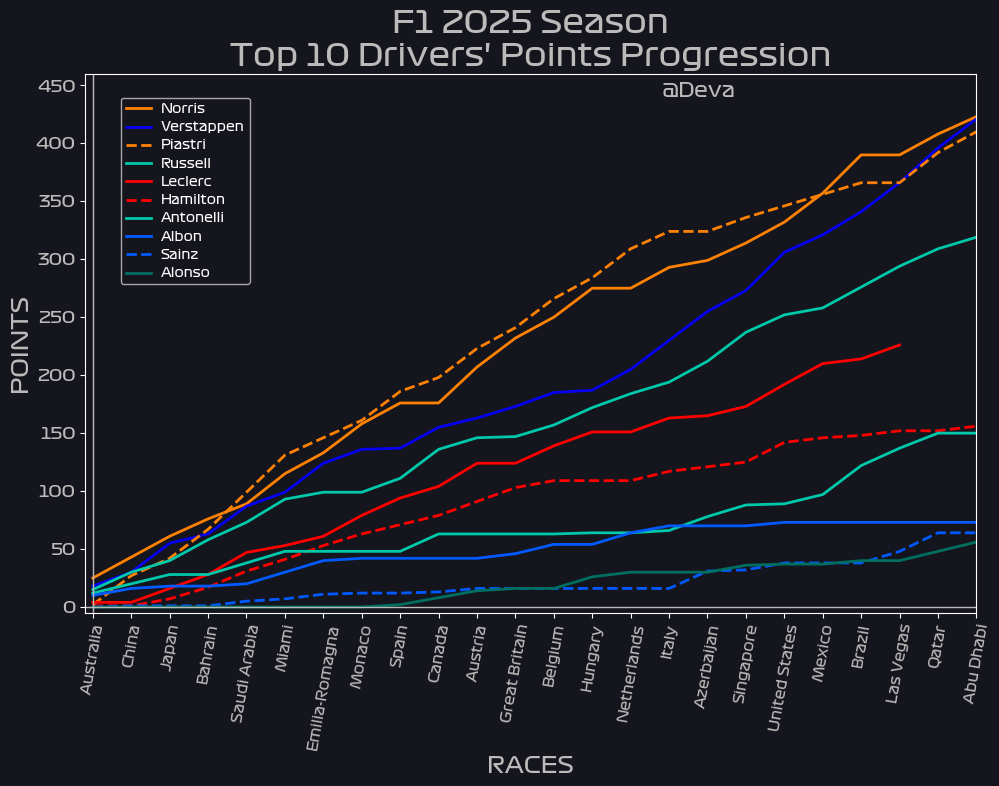

In [18]:
import numpy as np
import matplotlib.pyplot as plt

tracks = season2025RaceResults['Track'].unique()
tracksSprint = season2025SprintResults['Track'].unique()
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151d'
plt.rcParams['figure.facecolor'] = '#15151d'
plt.rcParams['grid.color'] = '#444444'
plt.rcParams['font.family'] = 'Formula1'
plt.figure(figsize=(11.5,7))
plt.axis([-0.2,21.3,-5,460])
c = assign_color('drivers', driverStandingsTop10)

for i in range(10):
    ls = '--' if driverStandingsTop10[i] in ['Oscar Piastri','Carlos Sainz','Lewis Hamilton','Sergio Perez'] else '-'
    plt.plot(np.cumsum(driverPointsTop10[driverStandingsTop10[i]]), label=driverStandingsTop10[i].split()[1], c=c[i], linewidth=2, ls=ls)

plt.title('F1 2025 Season\nTop 10 Drivers\' Points Progression', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(14.8, 440.0, '@Deva', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACES', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.ylabel('POINTS', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(range(0,460,50), range(0,460,50), fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04,0.61), fontsize=9)
plt.show()


## 2025 Season Constructors Standings

In [19]:
racePointsTeam = season2025RaceResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
sprintRacePointsTeam = season2025SprintResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
constructorStandings = (racePointsTeam + sprintRacePointsTeam).fillna(0).sort_values(ascending=False)
constructorStandings = pd.DataFrame(constructorStandings).reset_index()
constructorStandings['POS'] = range(1, len(constructorStandings) + 1)
constructorStandings.set_index('POS', inplace=True)
constructorStandings

,Team,Points
POS,,
1,McLaren Mercedes,823.0
2,Mercedes,469.0
3,Red Bull Racing Honda RBPT,451.0
4,Ferrari,398.0
5,Williams Mercedes,137.0
6,Racing Bulls Honda RBPT,92.0
7,Aston Martin Aramco Mercedes,89.0
8,Haas Ferrari,79.0
9,Kick Sauber Ferrari,70.0


## Points Progression of All Teams Throughout 2025 Season

In [20]:
teamNames = constructorStandings['Team'].unique()
teamPoints = {}; teamPointsSprint = {}
trackTeamPtsMerged = season2025RaceResults.groupby(['Track','Team'])['Points'].sum()
trackTeamPtsSprintMerged = season2025SprintResults.groupby(['Track','Team'])['Points'].sum()
for team in teamNames:
    if team in trackTeamPtsMerged.index.get_level_values(1):
        teamPoints[team] = trackTeamPtsMerged.loc[(slice(None), team)].reindex(tracks, level=0).fillna(0).values
    else:
        teamPoints[team] = np.zeros(len(tracks))
    if team in trackTeamPtsSprintMerged.index.get_level_values(1):
        teamPointsSprint[team] = trackTeamPtsSprintMerged.loc[(slice(None), team)].reindex(tracksSprint, level=0).fillna(0).values
    else:
        teamPointsSprint[team] = np.zeros(len(tracksSprint))
sp = [4, 5, 10, 18, 20, 22]
for team in teamNames:
    for i in range(len(sp)):
        if i < len(teamPointsSprint[team]) and sp[i] < len(teamPoints[team]):
            teamPoints[team][sp[i]] += teamPointsSprint[team][i]

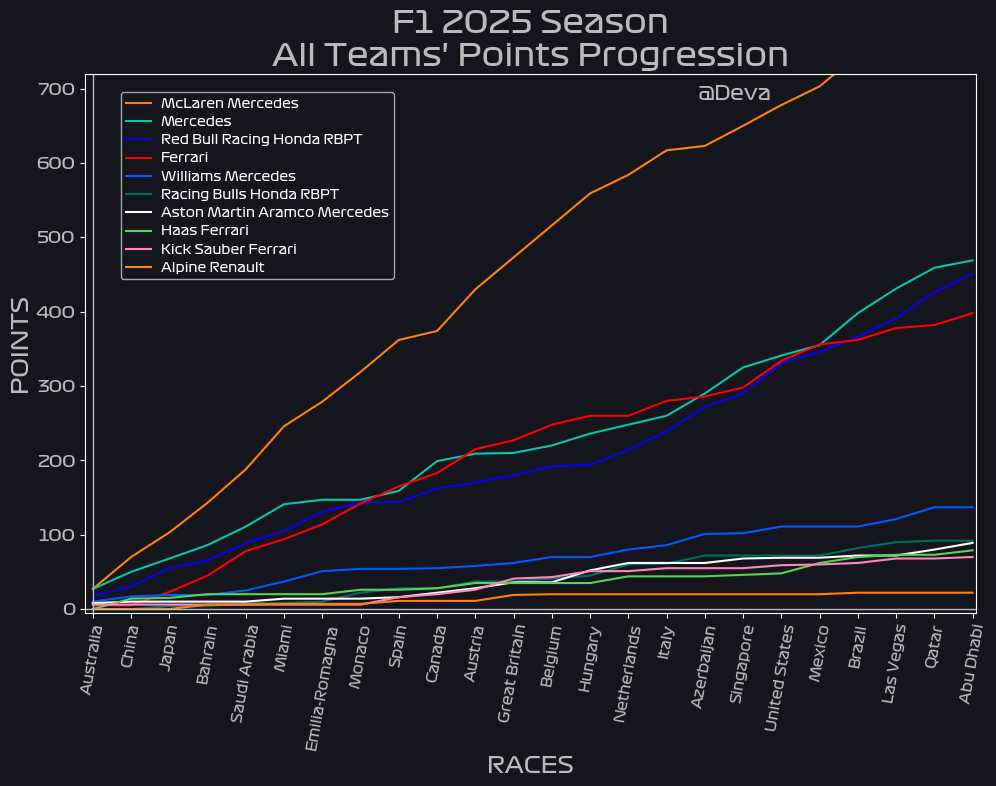

In [21]:
c = assign_color('teams', teamNames)
plt.figure(figsize=(11.5,7))
plt.axis([-0.2,23.1,-5,720])
for i in range(10):
    plt.plot(teamPoints[teamNames[i]].cumsum(), color=c[i], label=teamNames[i])
plt.title('F1 2025 Season\nAll Teams\' Points Progression', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(15.8, 685.0, '@Deva', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(fontsize=12, color='#bbbbbb')
plt.xlabel('RACES', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.ylabel('POINTS', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04,0.62), fontsize=9)
plt.show()

## 2025 Season Grand Prix Winners

In [22]:
season2025RaceResults[season2025RaceResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,
Australia,4,Lando Norris,McLaren Mercedes,1,57,42:06.3,25,Yes,01:22.2
China,81,Oscar Piastri,McLaren Mercedes,1,56,30:55.0,25,No,01:35.5
Japan,1,Max Verstappen,Red Bull Racing Honda RBPT,1,53,22:07.0,25,No,01:31.0
Bahrain,81,Oscar Piastri,McLaren Mercedes,1,57,35:39.4,25,Yes,01:35.1
Saudi Arabia,81,Oscar Piastri,McLaren Mercedes,2,50,21:06.8,25,No,01:32.2
Miami,81,Oscar Piastri,McLaren Mercedes,4,57,28:51.6,25,No,01:29.8
Emilia-Romagna,1,Max Verstappen,Red Bull Racing Honda RBPT,2,63,31:33.2,25,Yes,01:18.0
Monaco,4,Lando Norris,McLaren Mercedes,1,78,40:33.8,25,Yes,01:13.2
Spain,81,Oscar Piastri,McLaren Mercedes,1,66,32:57.4,25,Yes,01:15.7


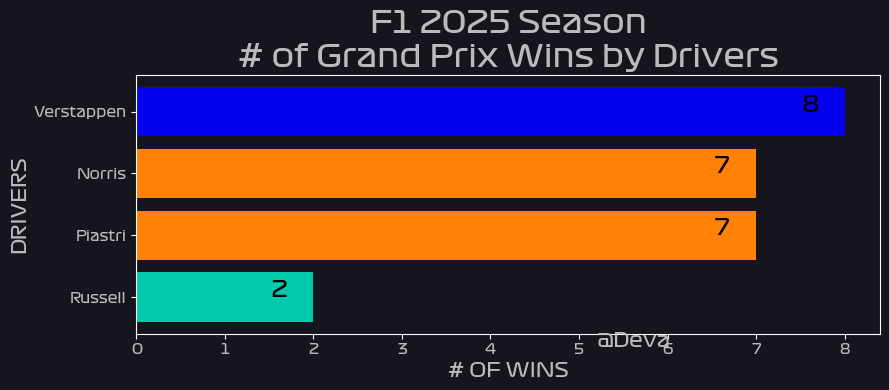

In [37]:
gpWinners = season2025RaceResults[season2025RaceResults['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', gpWinners.index)
plt.figure(figsize=(9.0, 4))
plt.barh([driver.split()[1] for driver in gpWinners.index], gpWinners.values, color=c)
for i, (driver, wins) in enumerate(gpWinners.items()):
    plt.text(wins - 0.6, i, "{:>3}".format(wins), fontsize=16, fontweight='bold', color='k')
plt.title('F1 2025 Season\n# of Grand Prix Wins by Drivers', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(gpWinners.max() * 0.65, len(gpWinners) - 0.2, '@Deva', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF WINS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.gca().invert_yaxis()  
plt.axvline(0, color='#bbbbbb')
plt.tight_layout()
plt.show()

### Pole Positions

In [24]:
season2024PolePos = season2025RaceResults[season2025RaceResults['Starting Grid'] == 1].set_index('Track') \
    .drop('Starting Grid', axis=1)
polePos = {}
for driver in season2024PolePos['Driver']:
    if driver not in polePos:   polePos[driver] = 1
    else:   polePos[driver] += 1
season2024PolePos

,Position,No,Driver,Team,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,
Australia,1,4,Lando Norris,McLaren Mercedes,57,42:06.3,25,Yes,01:22.2
China,1,81,Oscar Piastri,McLaren Mercedes,56,30:55.0,25,No,01:35.5
Japan,1,1,Max Verstappen,Red Bull Racing Honda RBPT,53,22:07.0,25,No,01:31.0
Bahrain,1,81,Oscar Piastri,McLaren Mercedes,57,35:39.4,25,Yes,01:35.1
Saudi Arabia,2,1,Max Verstappen,Red Bull Racing Honda RBPT,50,2.843,18,No,01:32.3
Miami,4,1,Max Verstappen,Red Bull Racing Honda RBPT,57,39.956,12,No,01:30.5
Emilia-Romagna,3,81,Oscar Piastri,McLaren Mercedes,63,12.956,15,No,01:18.9
Monaco,1,4,Lando Norris,McLaren Mercedes,78,40:33.8,25,Yes,01:13.2
Spain,1,81,Oscar Piastri,McLaren Mercedes,66,32:57.4,25,Yes,01:15.7


C:\Users\HP\AppData\Local\Temp\ipykernel_25400\433253799.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(polePositions[i]-0.4, i+0.19, polePositions[i], fontsize=21, fontweight='bold', color='k')


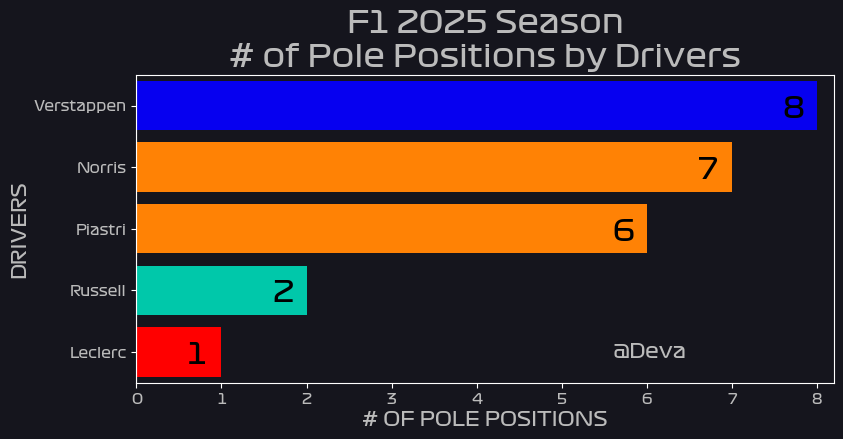

In [25]:
polePositions = pd.Series(polePos).sort_values(ascending=False)
c = assign_color('drivers', polePositions.index)
plt.figure(figsize=(9.0,4.0))
plt.axis([0,8.2,4.5,-0.5])
plt.barh([driver.split()[1] for driver in polePositions.index], polePositions, color=c)
plt.title('F1 2025 Season\n# of Pole Positions by Drivers', fontsize=22, fontweight='bold', color='#bbbbbb')
for i in range(len(polePositions)):
    plt.text(polePositions[i]-0.4, i+0.19, polePositions[i], fontsize=21, fontweight='bold', color='k')
plt.text(5.6, 4.1, '@Deva', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF POLE POSITIONS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

## 2025 Season Top 10 Finishes

C:\Users\HP\AppData\Local\Temp\ipykernel_25400\2826050726.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if top10Finishes[i] < 10:   pos = 0.7
C:\Users\HP\AppData\Local\Temp\ipykernel_25400\2826050726.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(top10Finishes[i]-pos, i+0.25, "{:>3}".format(top10Finishes[i]), fontsize=12, fontweight='bold', color='k')


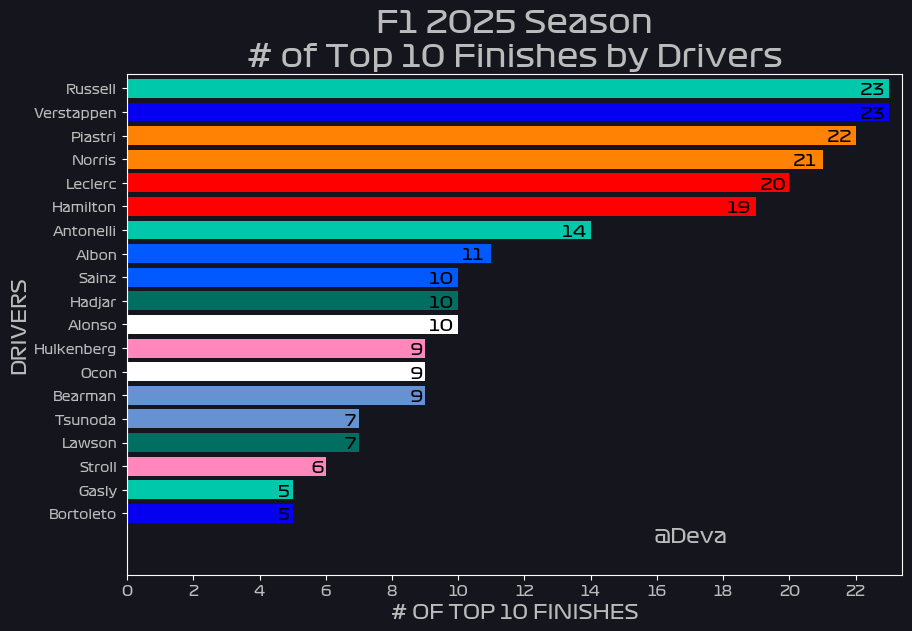

In [27]:
top10Finishes = season2025RaceResults[season2025RaceResults['Position'].isin([str(i) for i in range(1,11)])] \
                ['Driver'].value_counts()
c = assign_color('drivers', top10Finishes.index)
plt.figure(figsize=(10,6.5))
plt.axis([0,23.4,20.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in top10Finishes.index], top10Finishes, color=c)
for i in range(len(top10Finishes)):
    if top10Finishes[i] < 10:   pos = 0.7
    else:   pos = 1.0
    plt.text(top10Finishes[i]-pos, i+0.25, "{:>3}".format(top10Finishes[i]), fontsize=12, fontweight='bold', color='k')
plt.title('F1 2025 Season\n# of Top 10 Finishes by Drivers', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(15.9, 19.2, '@Deva', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF TOP 10 FINISHES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,24,2), range(0,24,2), color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

## 2025 Season Fastest Laps in Grands Prix

In [28]:
season2025RaceResults[season2025RaceResults['Set Fastest Lap'] == 'Yes'].set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,,
Australia,1,4,Lando Norris,McLaren Mercedes,1,57,42:06.3,25,Yes,01:22.2
China,DQ,44,Lewis Hamilton,Ferrari,5,0,DSQ,0,Yes,01:35.1
Japan,6,12,Kimi Antonelli,Mercedes,6,53,18.671,8,Yes,01:31.0
Bahrain,1,81,Oscar Piastri,McLaren Mercedes,1,57,35:39.4,25,Yes,01:35.1
Saudi Arabia,4,4,Lando Norris,McLaren Mercedes,10,50,9.196,12,Yes,01:31.8
Miami,2,4,Lando Norris,McLaren Mercedes,2,57,4.63,18,Yes,01:29.7
Emilia-Romagna,1,1,Max Verstappen,Red Bull Racing Honda RBPT,2,63,31:33.2,25,Yes,01:18.0
Monaco,1,4,Lando Norris,McLaren Mercedes,1,78,40:33.8,25,Yes,01:13.2
Spain,1,81,Oscar Piastri,McLaren Mercedes,1,66,32:57.4,25,Yes,01:15.7


C:\Users\HP\AppData\Local\Temp\ipykernel_25400\2132658768.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(fastestLaps[i]-0.22, i+0.25, fastestLaps[i], fontsize=17, fontweight='bold', color='k')


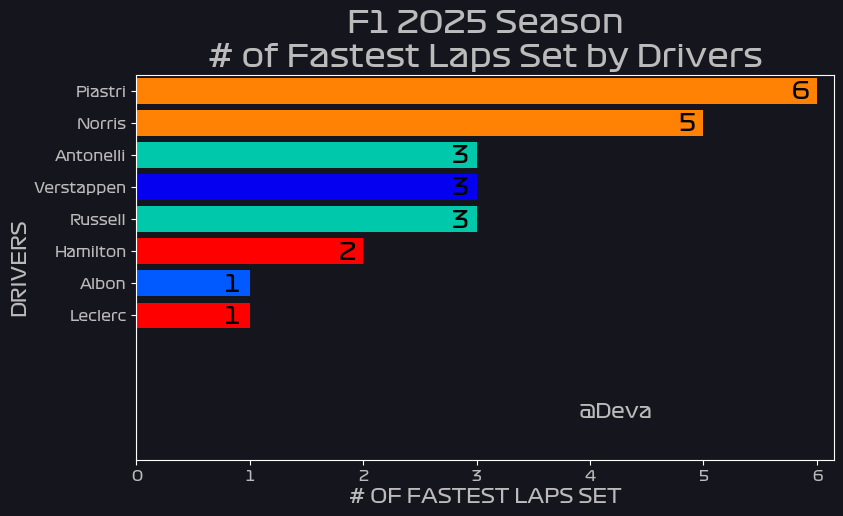

In [29]:
fastestLaps = season2025RaceResults[season2025RaceResults['Set Fastest Lap'] == 'Yes']['Driver'].value_counts()
c = assign_color('drivers', fastestLaps.index)
plt.figure(figsize=(9,5))
plt.axis([0,6.15,11.5,-0.5])
plt.barh([driver.split()[1] for driver in fastestLaps.index], fastestLaps, color=c)
for i in range(len(fastestLaps)):
    plt.text(fastestLaps[i]-0.22, i+0.25, fastestLaps[i], fontsize=17, fontweight='bold', color='k')
plt.title('F1 2025 Season\n# of Fastest Laps Set by Drivers', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(3.9, 10.2, '@Deva', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF FASTEST LAPS SET', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

## 2025 Season Qualifying Analysis

In [30]:
season2025QualifyingResults[season2025QualifyingResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)

,No,Driver,Team,Q1,Q2,Q3,Laps
Track,,,,,,,
Australia,4,Lando Norris,McLaren Mercedes,1:15.912,1:15.415,1:15.096,20
China,81,Oscar Piastri,McLaren Mercedes,1:31.591,1:31.200,1:30.641,20
Japan,1,Max Verstappen,Red Bull Racing Honda RBPT,1:27.943,1:27.502,1:26.983,17
Bahrain,81,Oscar Piastri,McLaren Mercedes,1:31.392,1:30.454,1:29.841,15
Saudi Arabia,1,Max Verstappen,Red Bull Racing Honda RBPT,1:27.778,1:27.529,1:27.294,19
Miami,1,Max Verstappen,Red Bull Racing Honda RBPT,1:26.870,1:26.643,1:26.204,18
Emilia-Romagna,81,Oscar Piastri,McLaren Mercedes,1:15.500,1:15.214,1:14.670,18
Monaco,4,Lando Norris,McLaren Mercedes,1:11.285,1:10.570,1:09.954,27
Spain,81,Oscar Piastri,McLaren Mercedes,1:12.591,1:11.998,1:11.546,14


C:\Users\HP\AppData\Local\Temp\ipykernel_25400\2330570213.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if fastestTimeQualifying[i] < 10:   pos = 0.4
C:\Users\HP\AppData\Local\Temp\ipykernel_25400\2330570213.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(fastestTimeQualifying[i]-pos, i+0.15, fastestTimeQualifying[i], fontsize=17, fontweight='bold', color='k')


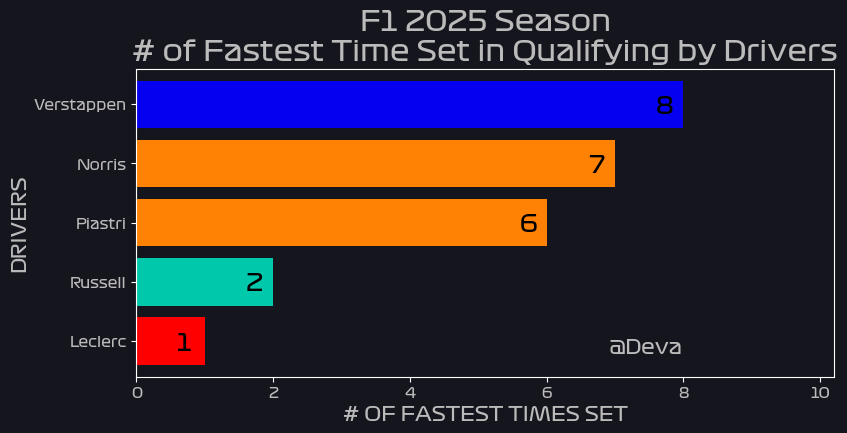

In [49]:
fastestTimeQualifying = season2025QualifyingResults[season2025QualifyingResults['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', fastestTimeQualifying.index)
plt.figure(figsize=(9.0,4.0))
plt.axis([0,10.2,4.6,-0.6])
plt.barh([driver.split()[1] for driver in fastestTimeQualifying.index], fastestTimeQualifying, color=c)
for i in range(len(fastestTimeQualifying)):
    if fastestTimeQualifying[i] < 10:   pos = 0.4
    else:   pos = 0.6
    plt.text(fastestTimeQualifying[i]-pos, i+0.15, fastestTimeQualifying[i], fontsize=17, fontweight='bold', color='k')
plt.title('F1 2025 Season\n# of Fastest Time Set in Qualifying by Drivers', fontsize=20, fontweight='bold', 
          color='#bbbbbb')
plt.text(6.9, 4.2, '@Deva', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF FASTEST TIMES SET', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

### Cross Validation Between Fastest Lap Setter in Qualifying & Pole Sitter in Race Sessions

In [32]:
driverFastestTimeSetQuali = season2025QualifyingResults[season2025QualifyingResults['Position'] == '1']['Driver']
driverFastestTimeSetQuali = driverFastestTimeSetQuali.reset_index().drop('index',axis=1)
driverStartingPolePosRace = season2025RaceResults[season2025RaceResults['Starting Grid'] == 1]['Driver']
driverStartingPolePosRace = driverStartingPolePosRace.reset_index().drop('index',axis=1)
fastestLapSettersPoleSitters = pd.concat([driverFastestTimeSetQuali, driverStartingPolePosRace],axis=1)
tracks = season2025RaceResults['Track'].unique()
fastestLapSettersPoleSitters.columns = ['Driver Setting Fastest Lap in the Qualifying','Driver Being Pole Sitter in the Race']
fastestLapSettersPoleSitters = fastestLapSettersPoleSitters.set_index(tracks)
fastestLapSettersPoleSitters

,Driver Setting Fastest Lap in the Qualifying,Driver Being Pole Sitter in the Race
Australia,Lando Norris,Lando Norris
China,Oscar Piastri,Oscar Piastri
Japan,Max Verstappen,Max Verstappen
Bahrain,Oscar Piastri,Oscar Piastri
Saudi Arabia,Max Verstappen,Max Verstappen
Miami,Max Verstappen,Max Verstappen
Emilia-Romagna,Oscar Piastri,Oscar Piastri
Monaco,Lando Norris,Lando Norris
Spain,Oscar Piastri,Oscar Piastri
Canada,George Russell,George Russell


## 2025 Season Sprint Sessions

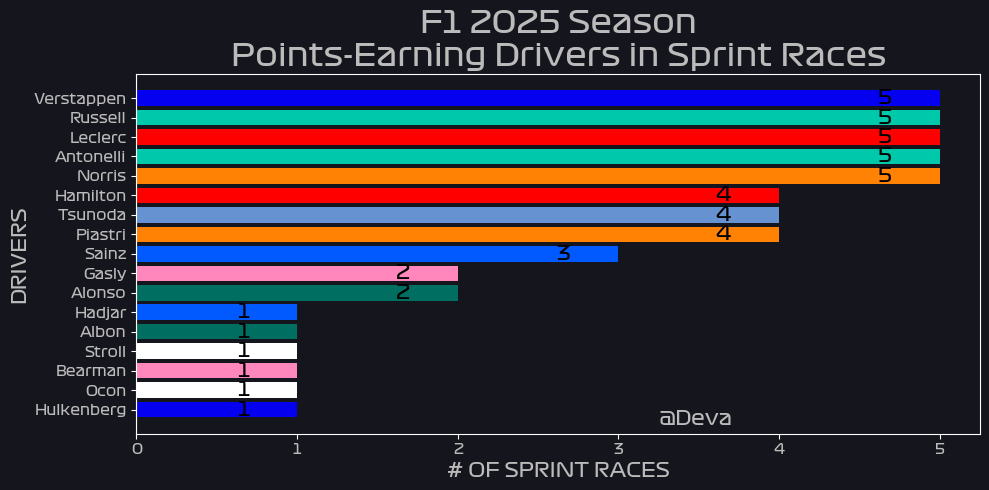

In [46]:
# 🔥

sprintPointScorers = season2025SprintResults[season2025SprintResults['Points'] != 0]
sprintPointScorersDriverCnt = sprintPointScorers['Driver'].value_counts()

plt.figure(figsize=(10, 5))
c = assign_color('drivers', sprintPointScorersDriverCnt.index)

plt.barh([driver.split()[1] for driver in sprintPointScorersDriverCnt.index], sprintPointScorersDriverCnt.values, color=c)

for i, val in enumerate(sprintPointScorersDriverCnt.values):
    plt.text(val - 0.3, i, str(val), fontsize=14, fontweight='bold', color='k', va='center', ha='right')

plt.title('F1 2025 Season\nPoints-Earning Drivers in Sprint Races', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.text(sprintPointScorersDriverCnt.max() * 0.65, len(sprintPointScorersDriverCnt) - 0.2, '@Deva', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF SPRINT RACES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.gca().invert_yaxis()
plt.axvline(0, color='#bbbbbb')
plt.tight_layout()
plt.show()

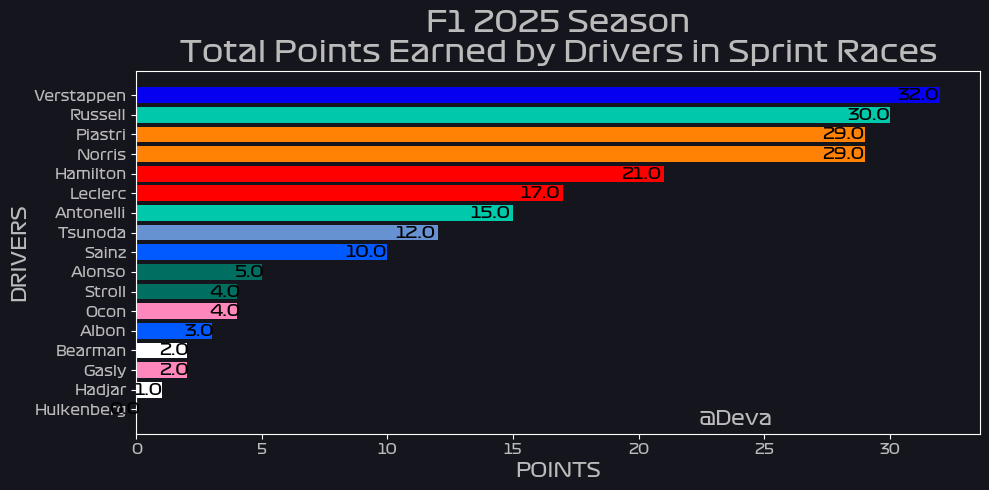

In [44]:
sprintPointScorersTotal = sprintPointScorers.groupby('Driver')['Points'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
c = assign_color('drivers', sprintPointScorersTotal.index)

plt.barh([driver.split()[1] for driver in sprintPointScorersTotal.index], sprintPointScorersTotal.values, color=c)

for i, point in enumerate(sprintPointScorersTotal.values):
    pos = 1.1 if point < 10 else 1.7
    plt.text(point - pos, i, str(point), fontsize=12, fontweight='bold', color='k', va='center')

plt.title('F1 2025 Season\nTotal Points Earned by Drivers in Sprint Races', fontsize=21, fontweight='bold', color='#bbbbbb')
plt.text(sprintPointScorersTotal.max() * 0.7, len(sprintPointScorersTotal) - 0.2, '@Deva', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('POINTS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.gca().invert_yaxis()
plt.axvline(0, color='#bbbbbb')
plt.tight_layout()
plt.show()

## 2025 Season DNF Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_25400\2598225010.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(DNFdriver[i]-0.17, i+0.22, DNFdriver[i], fontsize=12, fontweight='bold', color='k')


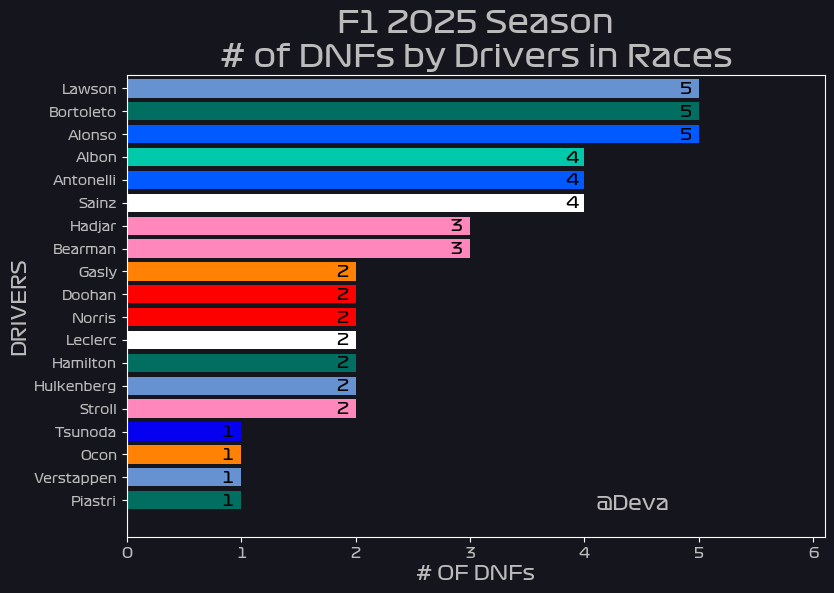

In [35]:
DNFdriver = season2025RaceResults[season2025RaceResults['Time/Retired'] == 'DNF']['Driver'].value_counts()
c = assign_color('drivers', DNFdriver.index)
plt.figure(figsize=(9,6))
plt.axis([0,6.1,19.6,-0.6])
plt.barh([driver.split()[1] for driver in DNFdriver.index], DNFdriver, color=c)
plt.text(4.1, 18.4, '@Deva', fontsize=14, fontweight='bold', color='#bbbbbb')
for i in range(len(DNFdriver)):
    plt.text(DNFdriver[i]-0.17, i+0.22, DNFdriver[i], fontsize=12, fontweight='bold', color='k')
plt.title('F1 2025 Season\n# of DNFs by Drivers in Races', fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

## 2025 Season Total Laps & Race Distances Driven in Race Sessions

C:\Users\HP\AppData\Local\Temp\ipykernel_25400\3298982157.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if driversTotalLaps[i] < 100:   pos = 55
C:\Users\HP\AppData\Local\Temp\ipykernel_25400\3298982157.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif driversTotalLaps[i] < 1000:   pos = 85
C:\Users\HP\AppData\Local\Temp\ipykernel_25400\3298982157.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(driversTota

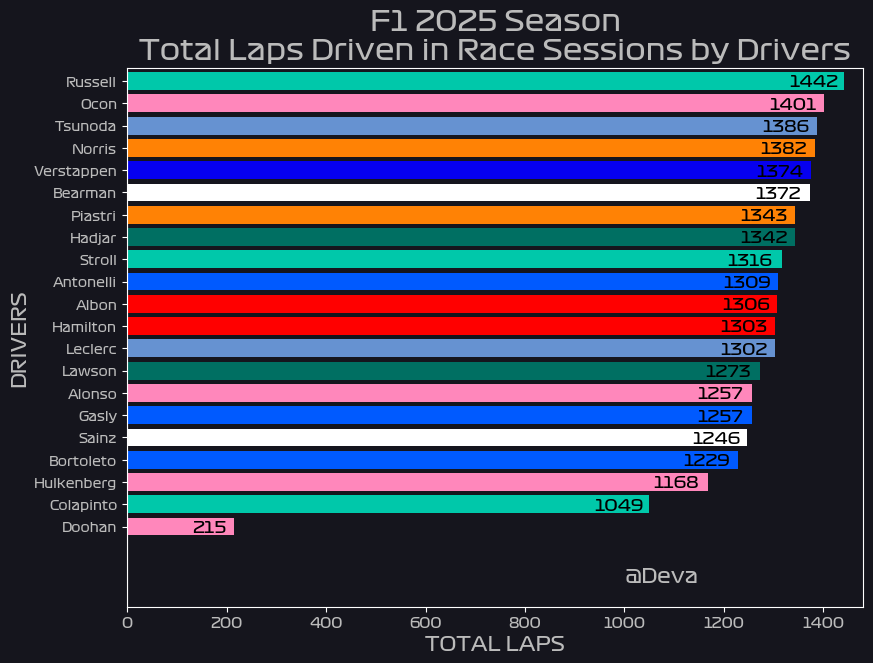

In [36]:
driversTotalLaps = season2025RaceResults.groupby('Driver')['Laps'].sum().sort_values(ascending=False)
c = assign_color('drivers', driversTotalLaps.index)
plt.figure(figsize=(9.5,7.0))
plt.axis([0,1480,23.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in driversTotalLaps.index], driversTotalLaps, color=c)
for i in range(len(driversTotalLaps)):
    if driversTotalLaps[i] < 100:   pos = 55
    elif driversTotalLaps[i] < 1000:   pos = 85
    else:   pos = 110
    plt.text(driversTotalLaps[i]-pos, i+0.25, driversTotalLaps[i], fontsize=12, fontweight='bold', color='k')
plt.title('F1 2025 Season\nTotal Laps Driven in Race Sessions by Drivers', fontsize=20, fontweight='bold', 
          color='#bbbbbb')
plt.text(1000, 22.5, '@Deva', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOTAL LAPS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()